In [91]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline


In [92]:
def planet_1(m1,m2,msun,r2,rsun,theta2,thetasun,dt,v0x,v0y):
    def gravity_sun(msun,m1,r):
        #https://physics.nist.gov/cgi-bin/cuu/Value?bg
        G = 6.67430*(10**-11)
        return(-G*msun*m1/(r**2))
    def gravity_m2(m2,m1,r):
        #https://physics.nist.gov/cgi-bin/cuu/Value?bg
        G = 6.67430*(10**-11)
        return(-G*m2*m1/(r**2))
    def fx(m1,m2,msun,r2,rsun,thetasun,theta2):
        gsun = gravity_sun(msun,m1,rsun)
        gm2 = gravity_m2(m2,m1,r2)
        return(np.cos(thetasun)*gsun + np.sin(theta2)*gm2)
    def fy(m1,m2,msun,r2,rsun,thetasun,theta2):
        gsun = gravity_sun(msun,m1,rsun)
        gm2 = gravity_m2(m2,m1,r2)
        return(np.sin(thetasun)*gsun + np.cos(theta2)*gm2)
    def ax(m1,m2,msun,r2,rsun,thetasun,theta2):
        return(fx(m1,m2,msun,r2,rsun,thetasun,theta2)/m1)
    def ay(m1,m2,msun,r2,rsun,thetasun,theta2):
        return(fy(m1,m2,msun,r2,rsun,thetasun,theta2)/m1)
    def vx(m1,m2,msun,r2,rsun,thetasun,theta2,dt,v0x):
        return(ax(m1,m2,msun,r2,rsun,thetasun,theta2)*dt+v0x)
    def vy(m1,m2,msun,r2,rsun,thetasun,theta2,dt,v0y):
        return(ay(m1,m2,msun,r2,rsun,thetasun,theta2)*dt+v0y)
    return(gravity_sun(msun,m1,rsun),gravity_m2(m2,m1,r2),fx(m1,m2,msun,r2,rsun,thetasun,theta2),
          fy(m1,m2,msun,r2,rsun,thetasun,theta2),ax(m1,m2,msun,r2,rsun,thetasun,theta2),
          ay(m1,m2,msun,r2,rsun,thetasun,theta2),vx(m1,m2,msun,r2,rsun,thetasun,theta2,dt,v0x),
          vy(m1,m2,msun,r2,rsun,thetasun,theta2,dt,v0y))
    

In [93]:
def planet_2(m1,m2,msun,r1,rsun,theta2,thetasun,dt,v0x,v0y):
    def gravity_sun(msun,m1,r):
        #https://physics.nist.gov/cgi-bin/cuu/Value?bg
        G = 6.67430*(10**-11)
        return(-G*msun*m1/(r**2))
    def gravity_m1(m2,m1,r):
        #https://physics.nist.gov/cgi-bin/cuu/Value?bg
        G = 6.67430*(10**-11)
        return(-G*m2*m1/(r**2))
    def fx(m1,m2,msun,r1,rsun,thetasun,theta2):
        gsun = gravity_sun(msun,m1,rsun)
        gm2 = gravity_m1(m2,m1,r1)
        return(np.cos(thetasun)*gsun + np.sin(theta2)*gm2)
    def fy(m1,m2,msun,r1,rsun,thetasun,theta2):
        gsun = gravity_sun(msun,m1,rsun)
        gm2 = gravity_m1(m2,m1,r1)
        return(np.sin(thetasun)*gsun + np.cos(theta2)*gm2)
    def ax(m1,m2,msun,r1,rsun,thetasun,theta2):
        return(fx(m1,m2,msun,r1,rsun,thetasun,theta2)/m2)
    def ay(m1,m2,msun,r1,rsun,thetasun,theta2):
        return(fy(m1,m2,msun,r1,rsun,thetasun,theta2)/m2)
    def vx(m1,m2,msun,r1,rsun,thetasun,theta2,dt,v0x):
        return(ax(m1,m2,msun,r1,rsun,thetasun,theta2)*dt+v0x)
    def vy(m1,m2,msun,r1,rsun,thetasun,theta2,dt,v0y):
        return(ay(m1,m2,msun,r1,rsun,thetasun,theta2)*dt+v0y)
    return(gravity_sun(msun,m2,rsun),gravity_m1(m2,m1,r1),fx(m1,m2,msun,r1,rsun,thetasun,theta2),
          fy(m1,m2,msun,r1,rsun,thetasun,theta2),ax(m1,m2,msun,r1,rsun,thetasun,theta2),
          ay(m1,m2,msun,r1,rsun,thetasun,theta2),vx(m1,m2,msun,r1,rsun,thetasun,theta2,dt,v0x),
          vy(m1,m2,msun,r1,rsun,thetasun,theta2,dt,v0y))
    

In [220]:
def initial_parameters():
    p1_pos = [0,5]
    p2_pos = [0,0]
    m1 = 1
    m2 = 1
    msun = 1000000

    
    x12 = p1_pos[0]-p2_pos[0]
    y12 = p1_pos[1]-p2_pos[1]
    rsun_1 = np.sqrt((p1_pos[0]**2) + (p1_pos[1]**2))
    r12 = np.sqrt((x12**2)+(y12**2)) 

    theta2 = np.arctan(x12/y12)
    if p1_pos[0] == 0:
        thetasun_1 = np.pi/2
    else:
        thetasun_1 = np.arctan(p1_pos[1]/p1_pos[0])
    
    
    dt = 0.01
    v0x = 0
    v0y = 0.1
    return(p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,theta2,thetasun_1,dt,v0x,v0y)

In [221]:
p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,theta2,thetasun_1,dt,v0x,v0y = initial_parameters()
print(p1_pos)
def pos_update(p1_pos,m1,m2,msun,r12,rsun,theta2,thetasun,dt,v0x,v0y):
    
    sun_on_p1, p2_on_p1, net_f_x_1, net_f_y_1, ax_1, ay_1, vx_1, vy_1 = planet_1(m1,m2,msun,r12,rsun,theta2,thetasun,dt,v0x,v0y)
    p1_pos[0] = p1_pos[0] + vx_1*dt + 0.5*ax_1*(dt**2)
    p1_pos[1] = p1_pos[1] + vy_1*dt + 0.5*ay_1*(dt**2)
    
    #update velocity
    v0x = v0x + ax_1*dt
    v0y = v0y + ay_1*dt
    
    #update angle
    theta2 = np.arctan(x12/y12)
    if p1_pos[0] == 0:
        thetasun_1 = np.pi/2
    else:
        thetasun_1 = np.arctan(p1_pos[1]/p1_pos[0])
    
#     print(thetasun_1)
    
    
    

pos_update(p1_pos,m1,m2,msun,r12,rsun_1,theta2,thetasun_1,dt,v0x,v0y)
print(p1_pos)
pos_update(p1_pos,m1,m2,msun,r12,rsun_1,theta2,thetasun_1,dt,v0x,v0y)
print(p1_pos)

[0, 5]
[-2.4520980394647537e-26, 5.000999999599542]
[-4.9041960789295075e-26, 5.001999999199084]


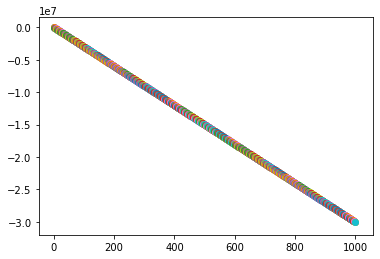

In [222]:
p1_pos,p2_pos,m1,m2,msun,r12,rsun_1,theta2,thetasun_1,dt,v0x,v0y = initial_parameters()
dt = 100000
x = []
for a in range(0,1000):
    x.append(a)
for i in range(1000):
    plt.scatter(x[i],p1_pos[1])
#     print(p1_pos[0],p1_pos[1])
    pos_update(p1_pos,m1,m2,msun,r12,rsun_1,theta2,thetasun_1,dt,v0x,v0y)